In [34]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [35]:
X = np.array([[1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5]])
Y_esp = np.array([0,1,2,3,4,5])

def H(theta0, theta1, X):
  var = np.array([theta0, theta1])
  h = var@X
  return h

In [36]:
sup = []
for i in range(-5, 5):
  coste = (1/(2*5)) * (H(0, i, X) - Y_esp)**2
  sup.append(coste.mean())

In [37]:
print(sup)

[33.0, 22.916666666666668, 14.666666666666666, 8.25, 3.6666666666666665, 0.9166666666666666, 0.0, 0.9166666666666666, 3.6666666666666665, 8.25]


In [38]:
sup = np.array(sup)
min_val = min(sup)
print(f'El minimo de la funcion de coste es {min_val}')
a = np.where(sup == min_val)[0][0]

El minimo de la funcion de coste es 0.0


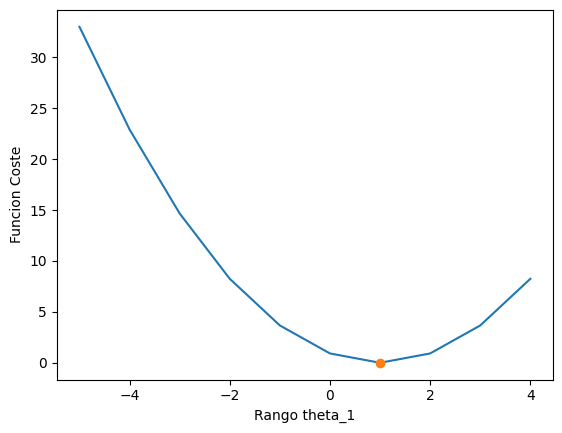

In [39]:
plt.plot(range(-5,5), sup)
plt.xlabel('Rango theta_1')
plt.ylabel('Funcion Coste')
plt.plot(range(-5,5)[a],sup[a], 'o')



<ipython-input-40-707b8680b459>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m--" (-> color='m'). The keyword argument will take precedence.
  plt.plot(X[-1], Y_mod,  'm--', color = 'black', label = 'Modelo')


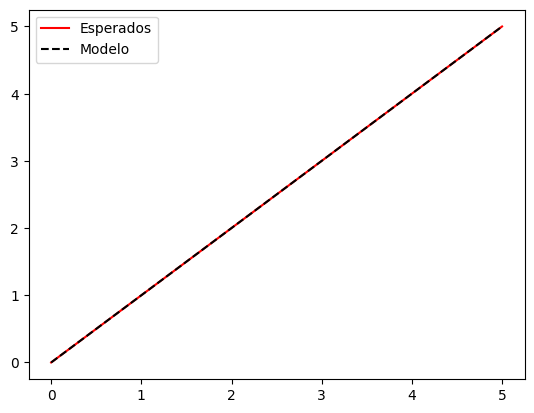

In [40]:
# theta0 = 0 por hipotesis.
# theta1 = 1 se encontro
Y_mod = range(-5,5)[a]*X[-1]


plt.plot(X[-1], Y_esp,  color = 'red', label = 'Esperados')
plt.plot(X[-1], Y_mod,  'm--', color = 'black', label = 'Modelo')
plt.legend()



## Punto 4

In [43]:
X = np.array([[1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5]])
Y_esp = np.array([0,1,2,3,4,5])

theta0 = np.linspace(-10,10, num=500)
theta1 = np.linspace(-10,10, num=500)
matriz = np.zeros( ( 500, 500 ) )

# Usar enumerate.
i1 = 0
j1 = 0
for i in enumerate(theta0):
  for j in enumerate(theta1):
    coste = (1/(2)) * (H(i[1], j[1], X) - Y_esp)**2
    matriz[i[0],j[0]] = coste.mean()



<ipython-input-44-f95446f1739a>:6: UserWarning: The following kwargs were not used by contour: 'linesstyle'
  ax.contour(xx, yy, matriz, 100, linesstyle='solid')


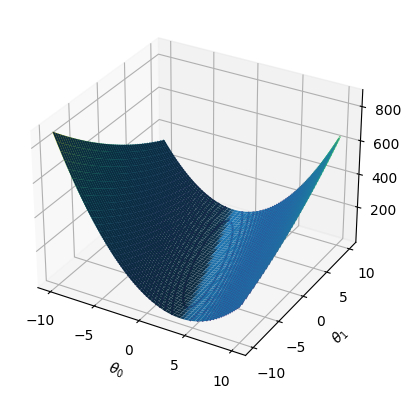

In [44]:
xx, yy = np.meshgrid(theta0, theta1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, matriz)
ax.contour(xx, yy, matriz, 100, linesstyle='solid')
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

### Punto 5)

Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

# Stochastic gradient descent

### Punto 1)


Proponer un numero aleatorio inicial

28


Para descender al mínimo de la función, encontremos un valor para el cual la derivada de la función desciende, asi:
$$w_{i+1} = w_{i} - \alpha * \frac{df(w_i)}{dw}$$

In [91]:
import random
y = lambda x: ( x - 4 ) ** 2
alpha = 0.01

# wi = random.randint(1,100)
# wi_1 = random.randint(1,100)
wi = 2
wi_1 = random.randint(1,100)
min = [wi, wi_1]
iter = 0
while abs(min[-1] - min[-2])>1E-4 :
  if y(min[-1]) - y(min[-2])/(min[-1] - min[-2]) > 0:
    wi_1 = wi - alpha*y(wi)
    min.append(wi_1)
    wi = wi_1
  else:
    wi_1 = wi + alpha*y(wi)
    min.append(wi_1)
    wi = wi_1
  iter += 1
  print(f'Iteracion: {iter} valor obtenido: {wi_1}')

Iteracion: 1 valor obtenido: -62.93938271604938
Iteracion: 2 valor obtenido: -61.802958464869576
Iteracion: 3 valor obtenido: -4048.0681734465957
Iteracion: 4 valor obtenido: -168239.54675889082
Iteracion: 5 valor obtenido: -283227049.80620813
Iteracion: 6 valor obtenido: -802175923304397.0
Iteracion: 7 valor obtenido: -6.434862119293486e+27
Iteracion: 8 valor obtenido: -4.140745049431826e+53
Iteracion: 9 valor obtenido: -1.7145769564394177e+105
Iteracion: 10 valor obtenido: -2.9397741395530565e+208


OverflowError: ignored

In [62]:
print(min)

[28.99, 22.744999, 19.23124912489999, 16.91133962585232, 15.244312716511278, 13.979967031844305, 12.983969612277313, 12.176852512334092, 11.508243342249449, 10.944506161385117, 10.46224450312996, 10.044638462947626, 9.679261921470168, 9.356721761743557, 9.069777081416188, 8.812750684863659, 8.581124993317102, 8.371257931273156, 8.180178972255971, 8.00544000985506, 7.845004513129584, 7.697163916069715, 7.560473705846835, 7.433703975746568, 7.315800745815991, 7.205855399956452, 7.103080311502152, 7.00678923730583, 6.916381422130048, 6.831328616136595, 6.7511643988110555, 6.675475343318202, 6.603893660191165, 6.536091038255328, 6.4717734607121375, 6.410676820301329, 6.352563192981948, 6.297217657212213, 6.244445567566138, 6.194070208508465, 6.145930767709821, 6.099880579111784, 6.055785594646475, 6.013523050534916, 5.972980299784561, 5.934053787151181, 5.8966481466352425, 5.860675404713893, 5.826054275096821, 5.792709532940827, 5.760571458245858, 5.7295753396499585, 5.699661031094705, 5.6

In [86]:
print(min[-2])

7
